Main content is currently provided solely as interactive life discussion.
We look at a few of more commonly used mathematical concepts in Data Science, such as vector spaces, probability & distributions, frequency domain, and differential calculus. Specifically, we look at those form the perspective of Data Science, and how they can be used in practice to and how we can think of them in a more intuitive way.

This notebook is primarily for running the visualizations and the exercises.

To keep track of the topics suggested for the discussion, in this notebook is also given this list of topics:

- statistical distributions
    - distributions: uniform, normal, etc; 
    - metrics: mean std mode, momenta space, AuC = 1
    - distributions proximity: Entropy, KL distance, Wasserstein distance
    - likelihood
    - number of samples in the dataset and model performance

# Interactive Demo

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.integrate import simpson as simps

In [2]:
def plt_2_hist(data, bins=30, label=None, title=None, density=False):
    fig, ax = plt.subplots(figsize=(10, 3), ncols=2, nrows=1)
    ax[0].hist(data, bins=bins, alpha=0.5, density=density)
    ax[1].hist(data, bins=bins, alpha=0.5, density=density, log=True)
    
    if label:
        ax[0].set_xlabel(label)
        ax[1].set_xlabel(label)
    y_lbl = 'Density' if density else 'count'
    
    ax[0].set_title('Linear Scale')
    ax[1].set_title('Log Scale')
    ax[0].set_ylabel(y_lbl)
    ax[1].set_ylabel(y_lbl)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(w_pad=0.6)
    plt.show()
    plt.close()

# Uniform Distribution

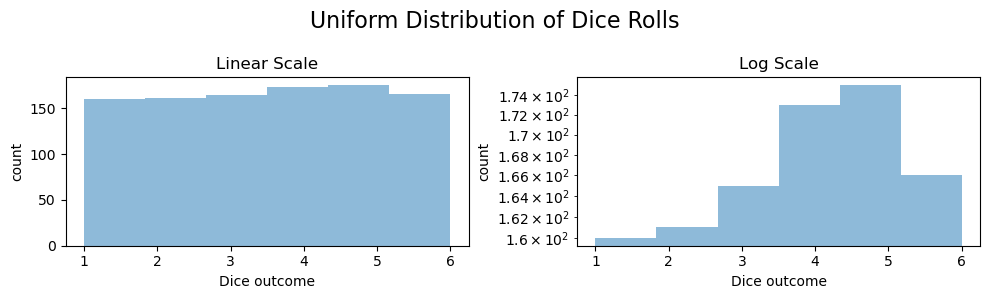

In [3]:
n_samples = 1000

uniform_distribution_dice = np.random.randint(1, 7, n_samples)
plt_2_hist(uniform_distribution_dice, bins=6,
           label='Dice outcome', title='Uniform Distribution of Dice Rolls', density=False)

# Normal Distribution

1D darts residuals

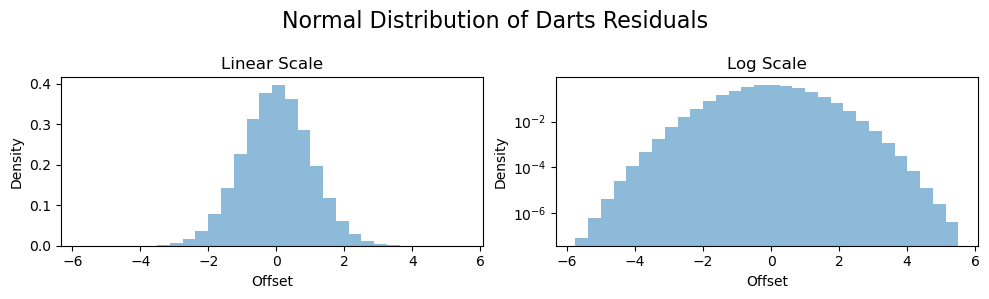

In [4]:
n_samples = 100_000_000
normal_distribution_darts = np.random.normal(0, 1, n_samples)
plt_2_hist(normal_distribution_darts, bins=30, label='Offset', title='Normal Distribution of Darts Residuals', density=True)

# derived values

# n-dimensional normal distribution, distance from the center:

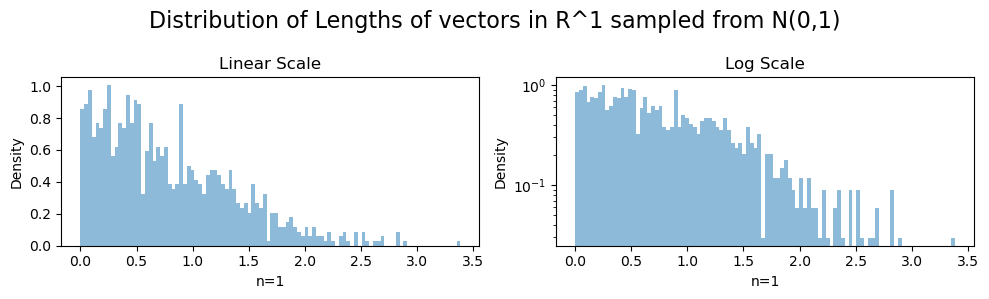

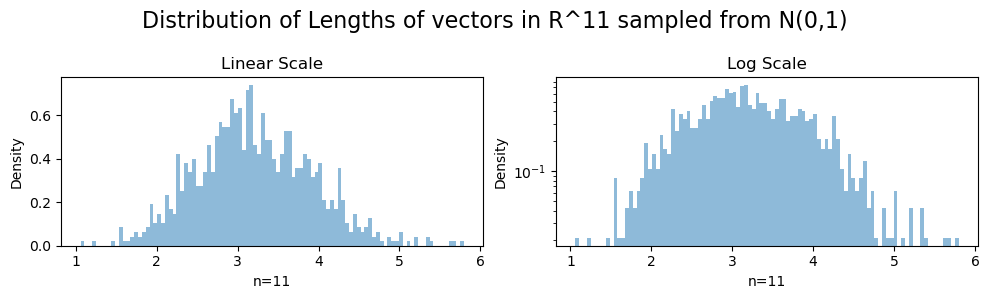

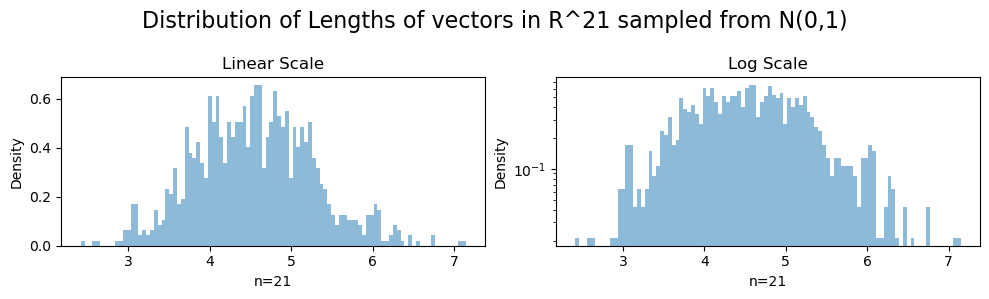

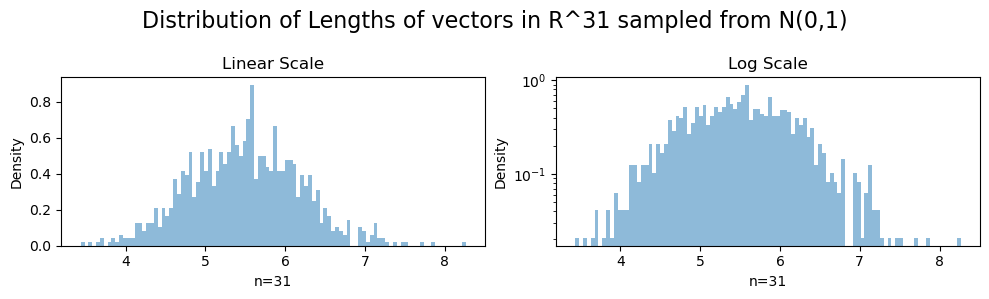

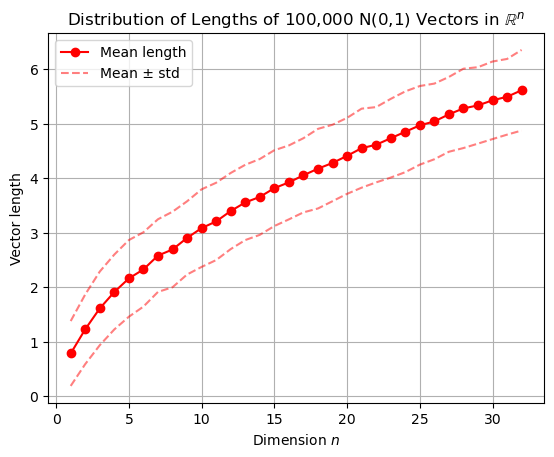

In [23]:
import numpy as np
import matplotlib.pyplot as plt

dims = list(range(1, 33, 1))
sample_size = 1000

mean_lengths = []
std_lengths = []

all_lengths = []
for i, n in enumerate(dims):
    X = np.random.randn(sample_size, n)  # 100,000 points in R^n
    lengths = np.linalg.norm(X, axis=1)
    mean_lengths.append(np.mean(lengths))
    std_lengths.append(np.std(lengths))
    if i % 10 == 0:
        plt_2_hist(lengths, bins=100, label=f'n={n}', title=f'Distribution of Lengths of vectors in R^{n} sampled from N(0,1)', density=True)
    all_lengths.append(lengths)
    
# Plot mean and 1 std dev as a function of n
plt.plot(dims, mean_lengths, 'o-', label='Mean length', color='red')
plt.plot(dims, np.array(mean_lengths) + np.array(std_lengths), 'r--', alpha=0.5, label='Mean ± std')
plt.plot(dims, np.array(mean_lengths) - np.array(std_lengths), 'r--', alpha=0.5)

plt.xlabel('Dimension $n$')
plt.ylabel('Vector length')
plt.title('Distribution of Lengths of 100,000 N(0,1) Vectors in $\mathbb{R}^n$')
plt.legend()
plt.grid(True)
plt.show()


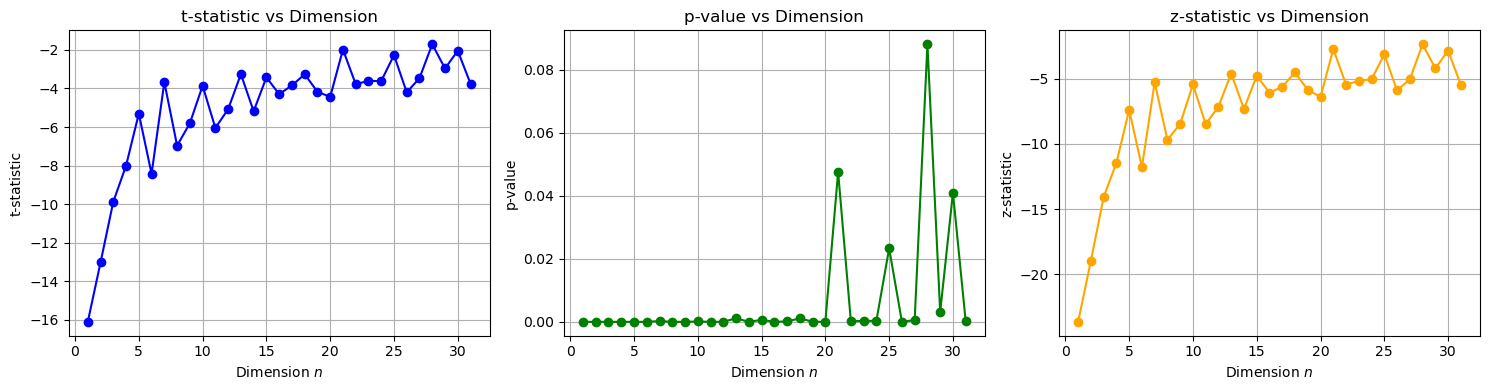

In [24]:
#Bonus:

# make t-test and the Z-test for all lengths wrt the last one, 
from scipy import stats
tz_test_results = []

for i, lengths in enumerate(all_lengths[:-1]):
    t_stat, p_value = stats.ttest_ind(lengths, all_lengths[i+1], equal_var=False)
    z_stat = (np.mean(lengths) - np.mean(all_lengths[i+1])) / (np.std(lengths) / np.sqrt(len(lengths)))
    tz_test_results.append((dims[i], t_stat, p_value, z_stat))
    
# plot t-test and z-test results vs dims
fig, ax = plt.subplots(figsize=(15, 4), ncols=3, nrows=1)

all_dims, all_t_stats, all_p_values, all_z_stats = zip(*tz_test_results)
ax[0].plot(all_dims, all_t_stats, 'o-', label='t-statistic', color='blue')
ax[0].set_title('t-statistic vs Dimension')
ax[0].set_xlabel('Dimension $n$')
ax[0].set_ylabel('t-statistic')
ax[0].grid(True)
ax[1].plot(all_dims, all_p_values, 'o-', label='p-value', color='green')
ax[1].set_title('p-value vs Dimension')
ax[1].set_xlabel('Dimension $n$')
ax[1].set_ylabel('p-value')
ax[1].grid(True)
ax[2].plot(all_dims, all_z_stats, 'o-', label='z-statistic', color='orange')
ax[2].set_title('z-statistic vs Dimension')
ax[2].set_xlabel('Dimension $n$')
ax[2].set_ylabel('z-statistic')
ax[2].grid(True)
plt.tight_layout(w_pad=1)
plt.show()
plt.close()

# Entropy

Entropy is a measure of uncertainty or randomness in a distribution. For a discrete distribution, the entropy $H$ is defined as:
$$H(X) = -\sum_{i} p(x_i) \log(p(x_i)) $$
where $ p(x_i) $ is the probability of outcome $ x_i $.

Low entropy says that the distribution is more predictable, while high entropy indicates more uncertainty.


In [27]:
def entropy_dicrete(distribution):
    """Calculate the entropy of a discrete distribution."""
    probabilities = np.bincount(distribution) / len(distribution)
    probabilities = probabilities[probabilities > 0]  # Remove zero probabilities
    return -np.sum(probabilities * np.log2(probabilities))

In [29]:
# Example: Entropy of a uniform distribution
n_samples = 1000
uniform_distribution_dice = np.random.randint(1, 7, n_samples)
uniform_distribution_coin = np.random.randint(0, 2, n_samples)

unfair_distribution_coin = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])

print("Entropy of fait distribution (dice):", entropy_dicrete(uniform_distribution_dice))
print("Entropy of fait distribution (coin):", entropy_dicrete(uniform_distribution_coin))
print("Entropy of unfair distribution (coin):", entropy_dicrete(unfair_distribution_coin))

Entropy of fait distribution (dice): 2.580928371792728
Entropy of fait distribution (coin): 0.9995123141215677
Entropy of unfair distribution (coin): 0.9587452303135016


How many samples do we need to detect an unfair coin?

# Cross-Entropy

Cross-entropy measures the difference between two probability distributions. It is defined as:
$$H(p, q) = -\sum_{i} p(x_i) \log(q(x_i))$$

where $p$ is the true distribution and $q$ is the estimated distribution.


In [19]:
def cross_entropy_kde(p, q, n_points=1000):
    # Estimate PDFs
    p_kde = gaussian_kde(p)
    q_kde = gaussian_kde(q)
    # Evaluate on grid
    grid = np.linspace(min(p.min(), q.min()), max(p.max(), q.max()), n_points)
    p_pdf = p_kde(grid)
    q_pdf = q_kde(grid)
    # Avoid log(0)
    q_pdf = np.where(q_pdf == 0, 1e-12, q_pdf)
    # Cross-entropy estimate
    ce = -np.sum(p_pdf * np.log(q_pdf)) * (grid[1] - grid[0])
    return ce

def cross_entropy_wasserstein_distance_kde(p, q, n_points=1000):
    """
    Estimate the 1D Wasserstein distance between distributions given by samples p and q,
    using KDE-smoothed CDFs.
    """
    p_kde = gaussian_kde(p)
    q_kde = gaussian_kde(q)
    # Evaluate on grid
    grid = np.linspace(min(p.min(), q.min()), max(p.max(), q.max()), n_points)
    p_pdf = p_kde(grid)
    q_pdf = q_kde(grid)
    # Avoid log(0)
    q_pdf = np.where(q_pdf == 0, 1e-12, q_pdf)
    # Cross-entropy estimate
    ce = -np.sum(p_pdf * np.log(q_pdf)) * (grid[1] - grid[0])
    
    cdf_p = np.cumsum(p_pdf)
    cdf_p /= cdf_p[-1]
    cdf_q = np.cumsum(q_pdf)
    cdf_q /= cdf_q[-1]
    wasserstein = simps(np.abs(cdf_p - cdf_q), x=grid)
    
    return ce, wasserstein

In [15]:
n_samples = 100000
normal_distribution_darts_1 = np.random.normal(0, 1, n_samples)

normal_distribution_darts_2 = np.random.normal(0, 0.1, n_samples)
print("Cross-entropy between two normal distributions:", cross_entropy_kde(normal_distribution_darts_1, normal_distribution_darts_2, n_points=1000))
print("Wasserstein distance between two normal distributions:", wasserstein_distance_kde(normal_distribution_darts_1, normal_distribution_darts_2, n_points=1000))


Cross-entropy between two normal distributions: 71.62378296737239
Wasserstein distance between two normal distributions: 0.7198715708416692


Cross-entropy between N(0, 1) and N(0, 0.01): 33.3876225813327 WD: 0.790490680586798
Cross-entropy between N(0, 1) and N(0, 0.015848931924611134): 36.98507946258363 WD: 0.7857761650705458
Cross-entropy between N(0, 1) and N(0, 0.025118864315095794): 42.2714845575301 WD: 0.7784360202606428
Cross-entropy between N(0, 1) and N(0, 0.039810717055349734): 50.80798558299919 WD: 0.7664875700598859
Cross-entropy between N(0, 1) and N(0, 0.06309573444801933): 61.14077809269373 WD: 0.7479577050062783
Cross-entropy between N(0, 1) and N(0, 0.1): 70.96316109031808 WD: 0.7181176625014694
Cross-entropy between N(0, 1) and N(0, 0.15848931924611143): 68.80384842483734 WD: 0.6711348354057983
Cross-entropy between N(0, 1) and N(0, 0.25118864315095807): 40.03316087791334 WD: 0.5968319115767751
Cross-entropy between N(0, 1) and N(0, 0.3981071705534973): 8.91343939195684 WD: 0.4802814869669055
Cross-entropy between N(0, 1) and N(0, 0.6309573444801934): 1.8455195029104643 WD: 0.29256259672346024
Cross-entrop

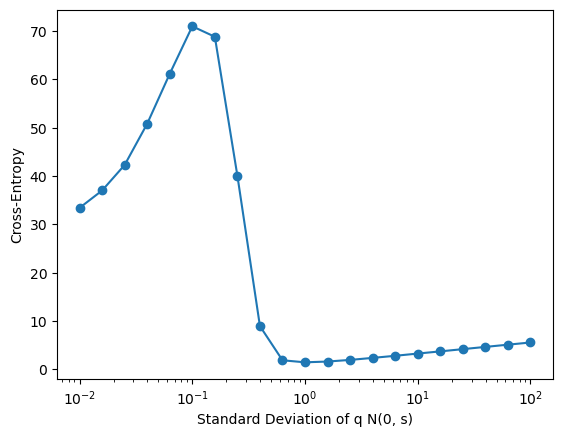

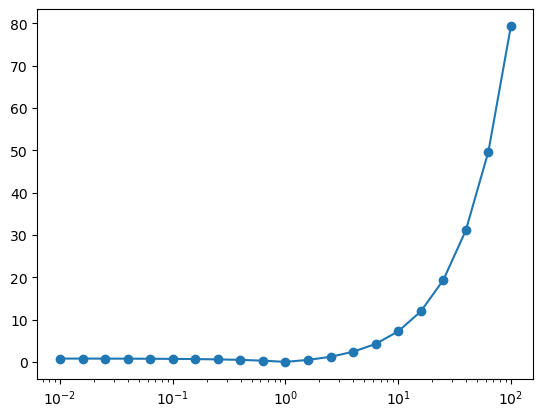

In [22]:
normal_distribution_darts_1 = np.random.normal(0, 1, n_samples)

entropy_values = []
wd = []
stds = np.logspace(-2, 2, 21)  # Logarithmic scale for better visualization
for s in stds:
    normal_distribution_darts_2 = np.random.normal(0, s, n_samples)
    ev = cross_entropy_kde(normal_distribution_darts_1, normal_distribution_darts_2, n_points=10_000)
    #ev, w = cross_entropy_wasserstein_distance_kde(normal_distribution_darts_1, normal_distribution_darts_2, n_points=10_000)
    print(f"Cross-entropy between N(0, 1) and N(0, {s}):", ev, "WD:", w)
    entropy_values.append(ev)
    wd.append(w)
    
plt.semilogx(stds, entropy_values, 'o-')
plt.xlabel('Standard Deviation of q N(0, s)')
plt.ylabel('Cross-Entropy')
plt.show()

plt.semilogx(stds, wd, 'o-')

Cross-entropy between N(0, 1) and N(-20.0, 1): 27.630483127762144
Cross-entropy between N(0, 1) and N(-18.0, 1): 27.630482733671712
Cross-entropy between N(0, 1) and N(-16.0, 1): 27.630482302396945
Cross-entropy between N(0, 1) and N(-14.0, 1): 27.630481908861288
Cross-entropy between N(0, 1) and N(-12.0, 1): 30.429093333424053
Cross-entropy between N(0, 1) and N(-10.0, 1): 133.7447440269199
Cross-entropy between N(0, 1) and N(-8.0, 1): 356.16594080129795
Cross-entropy between N(0, 1) and N(-6.0, 1): 145.55791738427394
Cross-entropy between N(0, 1) and N(-4.0, 1): 18.806704372293375
Cross-entropy between N(0, 1) and N(-2.0, 1): 3.4034613039130535
Cross-entropy between N(0, 1) and N(0.0, 1): 1.4234637468885962
Cross-entropy between N(0, 1) and N(2.0, 1): 3.6946153138149738
Cross-entropy between N(0, 1) and N(4.0, 1): 23.745614354845095
Cross-entropy between N(0, 1) and N(6.0, 1): 165.60425136069406
Cross-entropy between N(0, 1) and N(8.0, 1): 359.96563691436813
Cross-entropy between N(0

Text(0, 0.5, 'Cross-Entropy')

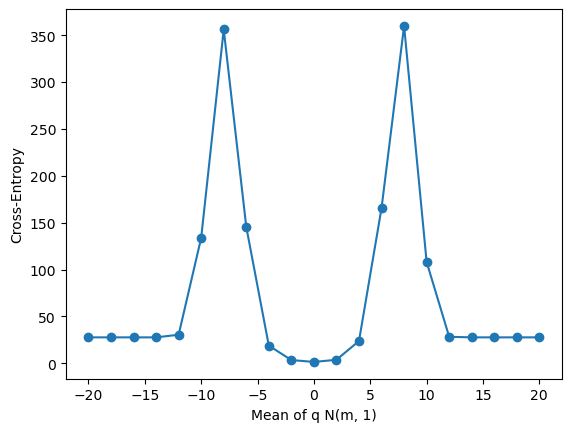

In [9]:
normal_distribution_darts_1 = np.random.normal(0, 1, n_samples)

entropy_values = []
ms = np.linspace(-20, 20, 21)
for m in ms:
    normal_distribution_darts_2 = np.random.normal(m, 1, n_samples)
    #plt.hist(normal_distribution_darts_1, bins=30, alpha=0.5, density=True, label=f'N({m}, 1)')
    # plt.hist(normal_distribution_darts_2, bins=30, alpha=0.5, density=True, label=f'N({m}, 1)')
    # plt.show()
    
    ev = cross_entropy_kde(normal_distribution_darts_1, normal_distribution_darts_2, n_points=10_000)
    print(f"Cross-entropy between N(0, 1) and N({m}, 1):", ev)
    entropy_values.append(ev)
    
plt.plot(ms, entropy_values, 'o-')
plt.xlabel('Mean of q N(m, 1)')
plt.ylabel('Cross-Entropy')



exercise - compare cross-entropy and Wasserstein distance for different distributions 

# likelihood

Probability = given model $P(X | \theta)$, where $X$ is the data and $\theta$ is the model parameter. How probable is the sample given the model's parameters $\theta$?

Likelihood is not a probability distribution, but a function of the parameters $\theta$ given the data $X$. It says how likely the parameters are given the data.

Here let's consider the model of a normal distribution with mean $\mu$ and standard deviation $\sigma$. The likelihood function is:

$$L(\mu, \sigma | X) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)$$

where $x_i$ are the data points.

This is difficult to maximize, so we often use the log-likelihood. Since the logarithm is a monotonic function, maximizing the log-likelihood is equivalent to maximizing the likelihood, and equivalent to minimizing the negative log-likelihood:

$$\mu, \sigma = \arg\max_{\mu, \sigma} L(\mu, \sigma | X) = $$
$$\arg\max_{\mu, \sigma} \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) =$$
$$\arg\max_{\mu, \sigma} \sum_{i=1}^{n} \left(-\log(\sqrt{2\pi\sigma^2}) - \frac{(x_i - \mu)^2}{2\sigma^2}\right) =$$ 
$$\arg\min_{\mu, \sigma} \left(\frac{n}{2}\log(2\pi) + n\log(\sigma) + \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2\right)$$ 